In [1]:
import h5py
import numpy as np
from urllib.request import urlopen, urlretrieve
import cv2
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
f = h5py.File('d.h5', 'r')

In [3]:
for key, val in list(f.items()):
    print(key)
    print(val)

test_cap
<HDF5 dataset "test_cap": shape (195954, 17), type "<i4">
test_imid
<HDF5 dataset "test_imid": shape (195954,), type "<i4">
test_ims
<HDF5 dataset "test_ims": shape (40504, 512), type "<f4">
test_url
<HDF5 dataset "test_url": shape (40504,), type "|S64">
train_cap
<HDF5 dataset "train_cap": shape (400135, 17), type "<i4">
train_imid
<HDF5 dataset "train_imid": shape (400135,), type "<i4">
train_ims
<HDF5 dataset "train_ims": shape (82783, 512), type "<f4">
train_url
<HDF5 dataset "train_url": shape (82783,), type "|S64">
word_key
<HDF5 dataset "word_key": shape (1,), type "|V15060">


In [4]:
f["word_key"][0]

((627., 317., 784., 865., 156., 829., 113., 234., 241., 749., 257., 505., 170., 274., 409., 693., 629., 297., 641., 49., 935., 13., 713., 226., 147., 774., 594., 112., 23., 799., 14., 142., 737., 500., 196., 758., 615., 496., 847., 762., 461., 659., 663., 837., 765., 99., 95., 927., 443., 29., 411., 619., 746., 791., 37., 195., 699., 696., 920., 995., 349., 184., 617., 236., 59., 440., 798., 25., 300., 305., 734., 825., 642., 60., 972., 706., 167., 91., 948., 511., 576., 55., 513., 176., 340., 338., 637., 239., 0., 875., 710., 785., 980., 178., 146., 315., 2., 219., 704., 607., 81., 721., 777., 263., 52., 203., 1003., 53., 117., 460., 681., 548., 221., 756., 294., 79., 412., 425., 245., 356., 493., 827., 286., 931., 933., 776., 903., 820., 730., 688., 473., 566., 422., 547., 911., 632., 251., 672., 344., 985., 555., 924., 882., 488., 17., 770., 97., 687., 507., 403., 959., 16., 818., 21., 423., 318., 891., 558., 722., 876., 939., 192., 689., 296., 39., 486., 450., 115., 808., 327., 429

In [5]:
f["test_cap"][1]

array([  1,   4,  42,   3, 131,  66,   8,  41,   6,   4,   3,   2,   0,
         0,   0,   0,   0])

In [6]:
len(f["train_url"])

82783

In [42]:
sample_sentence = []
garbages = ["<START>","<UNK>","<END>","<NULL>"]
for i in f["word_key"][0][1][f["test_cap"][5]]:
    sample_sentence.append(i.decode('utf-8'))
tit = [e for e in sample_sentence if e not in garbages]
" ".join(tit)
#     sample_sentence.strip(garbages)
    


'there is a plane taking off in a cloudy sky'

In [69]:
f["test_ims"][5]

array([-1.33745747e+01, -3.20079446e-01,  1.48331871e+01,  5.82412004e+00,
        2.05567684e+01, -4.92381668e+00,  1.31323681e+01,  1.41771202e+01,
        2.28388715e+00,  8.11892509e+00, -6.14300919e+00,  1.22457349e+00,
       -2.45248318e+00,  7.68520737e+00, -3.73196185e-01,  3.01257372e+00,
       -6.55724859e+00, -3.90816903e+00, -1.74591565e+00,  3.86249685e+00,
       -5.48918200e+00, -4.42208350e-01,  1.68570310e-01, -1.70744359e-02,
       -3.24520016e+00, -1.36643066e+01, -1.54455233e+00, -1.51642874e-01,
       -5.68045521e+00,  1.07645297e+00,  8.68082237e+00,  6.61215830e+00,
       -1.58321285e+00,  5.54593444e-01,  2.36219358e+00, -3.07325220e+00,
        1.82906103e+00,  5.50055885e+00,  1.36038661e+00,  3.25732636e+00,
        6.06369019e+00,  7.27747250e+00, -6.44181681e+00,  3.84671235e+00,
       -4.06003189e+00,  5.16134071e+00, -4.55486679e+00, -5.77346182e+00,
        6.03758287e+00,  2.63339663e+00,  4.04090500e+00, -3.82371020e+00,
       -4.43869638e+00,  

In [68]:
f["test_url"][f["test_imid"][1]-1]

b'http://farm3.staticflickr.com/2824/10213933686_6936eb402b_z.jpg'

1 1
2 2
3 3
4 4


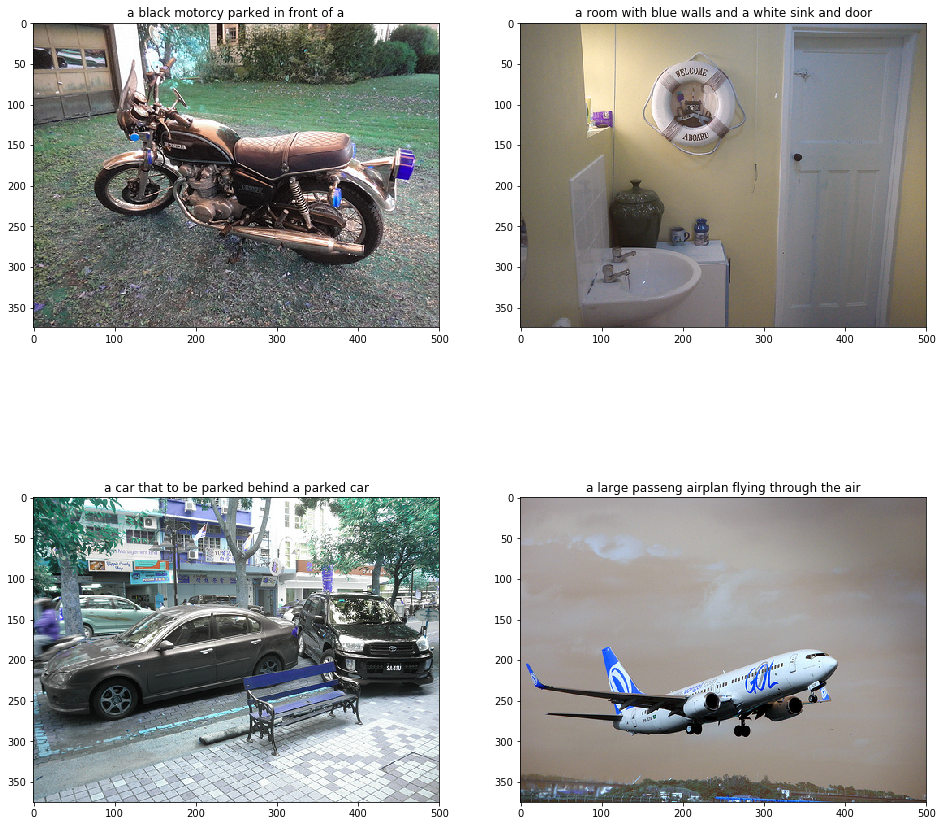

In [71]:
# get image url - download and bring its sentence
im_no_list = [1,2,3,4]
plt.figure(figsize=(16,16))
idx = 1

for im_no in im_no_list:
    print(idx,im_no)
    plt.subplot(2,2,idx)
    idx += 1
    url = f["test_url"][f["test_imid"][im_no]-1]
    garbages = ["<START>","<UNK>","<END>","<NULL>"]

    req = urlopen(url.decode('utf-8'))
    im = cv2.imdecode(np.asarray(bytearray(req.read()), dtype=np.uint8),-1)
    plt.imshow(im)

    sample_sentence = []
    for i in f["word_key"][0][1][f["test_cap"][im_no]]:
        sample_sentence.append(i.decode('utf-8'))

    tit = [e for e in sample_sentence if e not in garbages]
    title = " ".join(tit)

    plt.title(title)

1 29419
2 29465
3 29501


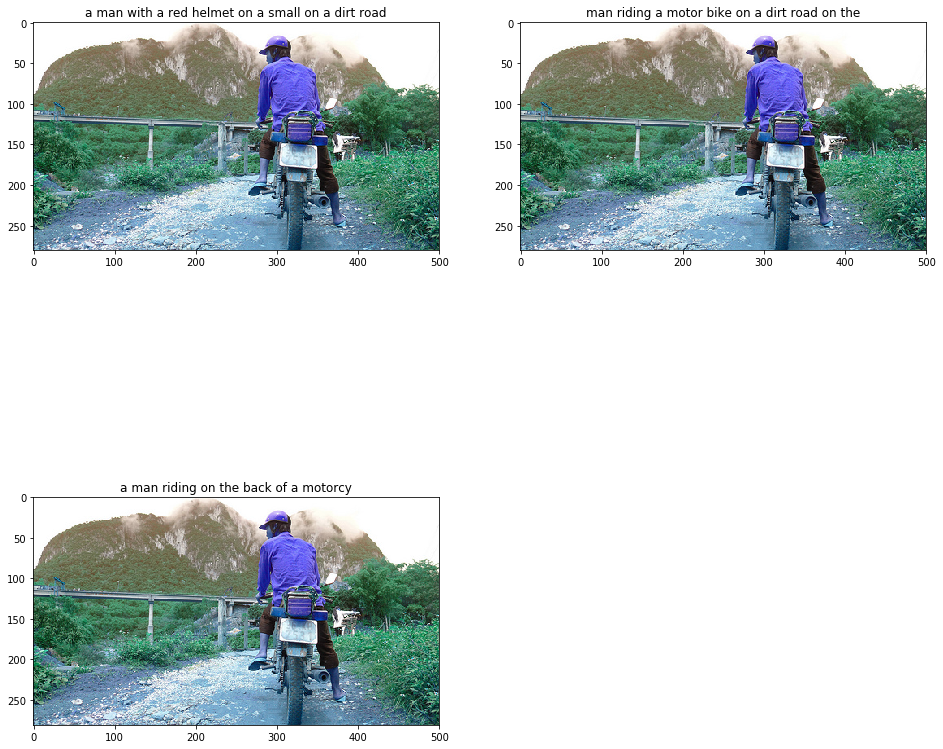

In [70]:
# get image url - download and bring its sentence
im_no_list = [29419, 29465, 29501]
plt.figure(figsize=(16,16))
idx = 1

for im_no in im_no_list:
    print(idx,im_no)
    plt.subplot(2,2,idx)
    idx += 1
    url = f["test_url"][f["test_imid"][im_no]-1]
    garbages = ["<START>","<UNK>","<END>","<NULL>"]

    req = urlopen(url.decode('utf-8'))
    im = cv2.imdecode(np.asarray(bytearray(req.read()), dtype=np.uint8),-1)
    plt.imshow(im)

    sample_sentence = []
    for i in f["word_key"][0][1][f["test_cap"][im_no]]:
        sample_sentence.append(i.decode('utf-8'))

    tit = [e for e in sample_sentence if e not in garbages]
    title = " ".join(tit)

    plt.title(title)

In [11]:
f["test_imid"][0]

30771

In [12]:
max(f["test_imid"])

40504

In [13]:
import matplotlib.pyplot as plt

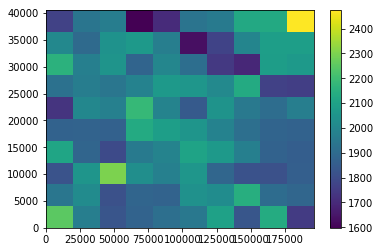

In [17]:
plt.figure()
plt.hist2d(range(195954),f["test_imid"])
plt.colorbar()
plt.show()

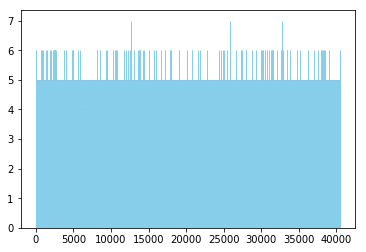

In [31]:
plt.figure()
plt.hist(f["test_imid"],bins=40504,color="red",ec="skyblue")
plt.show()

In [62]:
f["test_imid"][0]

30771

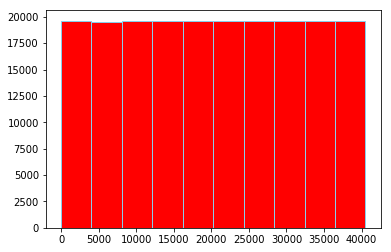

In [29]:
plt.figure()
plt.hist(f["test_imid"],color="red",ec="skyblue")
plt.show()